# Exercise Set 5: Python plotting

*Morning, August 14, 2019*

In this Exercise set we will work with visualizations in python, using two powerful plotting libraries. We will also quickly touch upon using pandas for exploratory plotting. 

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline 

iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

## Exercise Section 5.1: Exploring the data with plots

We will work with the two datasets `iris` and `titanic` both of which you should already have loaded. The goal with the plots you produce in this section is to give yourself and your group members an improved understanding of the datasets. 


> **Ex. 5.1.1:**: Show the first five rows of the titanic dataset. What information is in the dataset? Use a barplot to show the probability of survival for men and women within each passenger class. Can you make a boxplot showing the same information (why/why not?). _Bonus:_ show a boxplot for the fare-prices within each passenger class. 
>
> Spend five minutes discussing what you can learn about the survival-selection aboard titanic from the figure(s).
>
> > _Hint:_ https://seaborn.pydata.org/generated/seaborn.barplot.html, specifically the `hue` option.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\bjorn\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


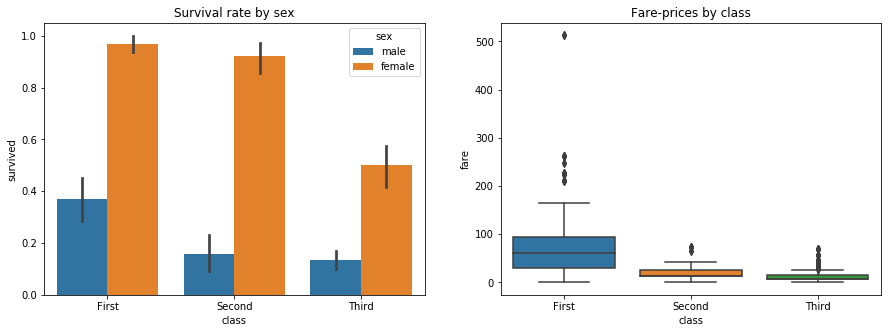

In [4]:
# [Answer to Ex. 5.1.1]
# Show first five rows of dataset
display(titanic.head(5))

# Figures
fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(15,5)) # Create subplots and format dimensions
bar = sns.barplot(x='class', y='survived', hue='sex', data=titanic, ax=ax[0]).set_title('Survival rate by sex') #barplot
box = sns.boxplot(x='class', y='fare', data=titanic,ax=ax[1]).set_title('Fare-prices by class') # boxplot
fig.show()

> **Ex. 5.1.2:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels.
> _Discuss:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
>> _Hint:_ use the `.regplot` method from seaborn. 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


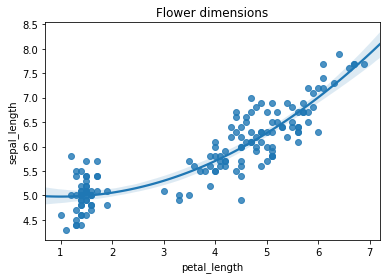

In [53]:
# [Answer to Ex. 5.1.2]
display(iris.head(5))

# Plot figure
sns.regplot(x='petal_length', y='sepal_length', data=iris, order=2).set_title('Flower dimensions') # scatter
plt.show()

> **Ex. 5.1.3:** Combine the two of the figures you created above into a two-panel figure similar to the one shown here:
> <img src="Example.png" alt="Drawing" style="width: 600px;"/>
>
> Save the figure as a png file on your computer. 
>> _Hint:_ See [this question](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot) on stackoverflow for inspiration.

C:\Users\bjorn\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


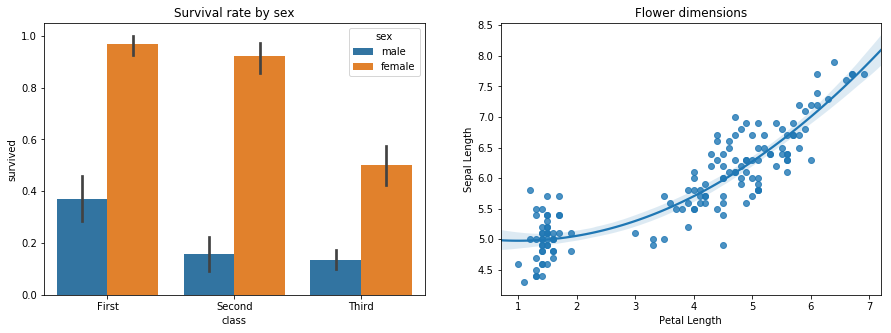

In [54]:
# [Answer to Ex. 5.1.3]

fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(15,5)) # Create subplots and format dimensions
sns.barplot(x='class', y='survived', hue='sex', data=titanic, ax=ax[0]).set_title('Survival rate by sex') #barplot
sns.regplot(x='petal_length', y='sepal_length', data=iris, order=2, ax=ax[1]).set_title('Flower dimensions') # scatter
plt.ylabel('Sepal Length')
plt.xlabel('Petal Length')
fig.show()
plt.savefig('My_Image')

> **Ex. 5.1.4:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements. Change the color palette and remove the shading from the density plots. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

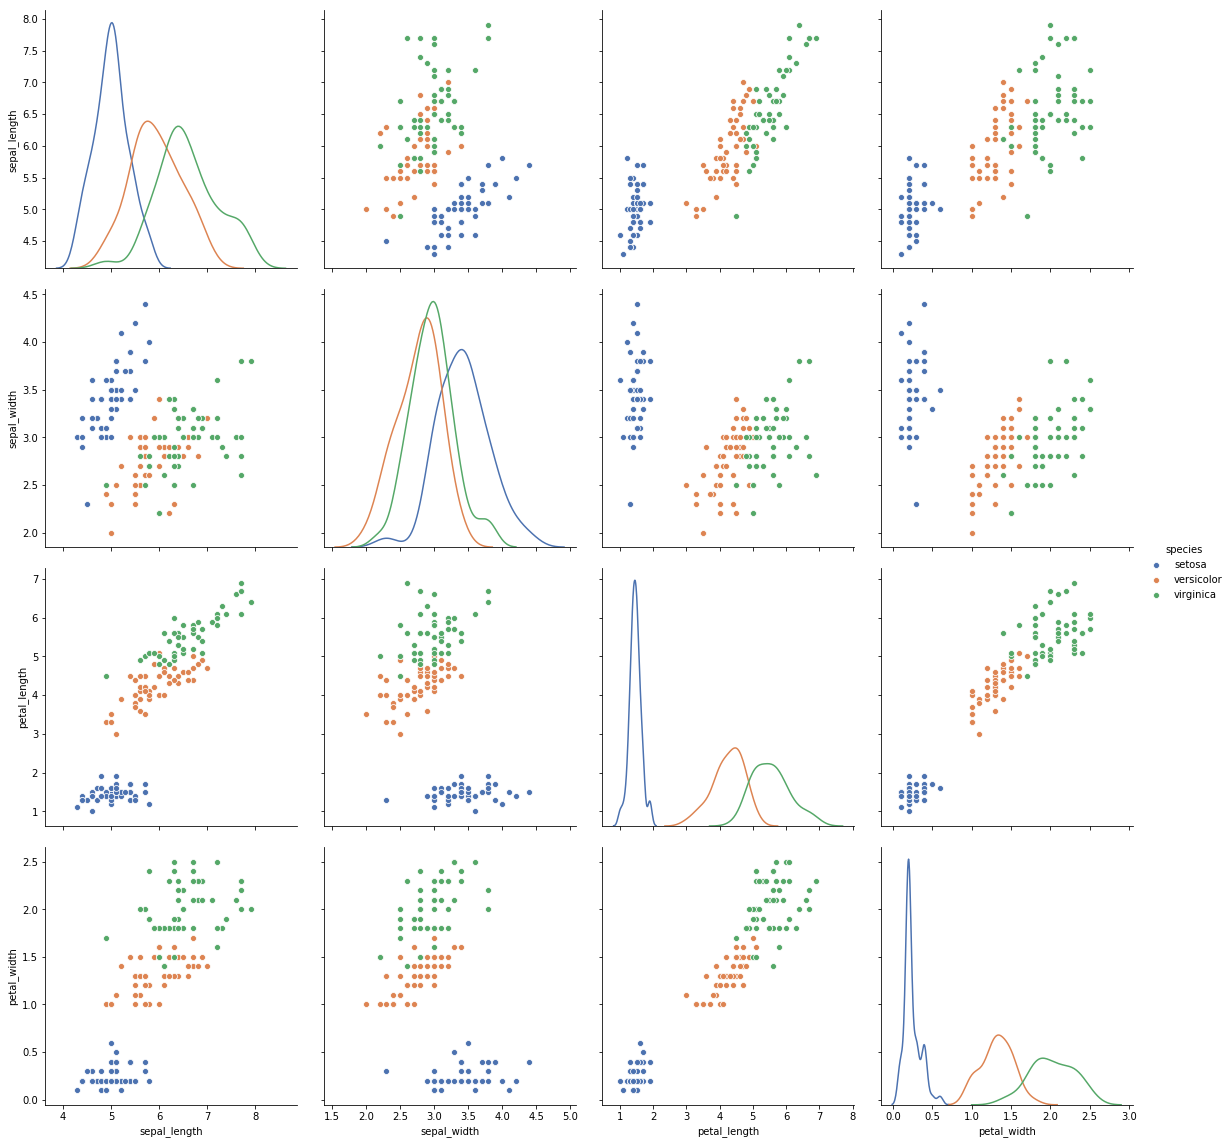

In [63]:
# [Answer to Ex. 5.1.4]
sns.pairplot(hue='species',data=iris, height=4, palette='deep', diag_kws=dict(shade=False)) # pairplots of all available numerical values

# diag_kws is an optional argument for diagonal plots. It uses a dictionary of keyword arguments, 
# in which we use the keyword "Shade" and set it to false to remove shading from all plots.

## Exercise Section 5.2: Explanatory plotting

In this section we will only work with the titanic dataset. We will create a simple figure from the bottom using the [_grammar of graphics_](http://vita.had.co.nz/papers/layered-grammar.pdf) framework.

<br>

**_NOTE:_** Because of the way the jupyter notebooks are made, you will have to complete this exercise in a single code cell. 

> **Ex. 5.2.1:** Create an empty coordinate system with the *x* axis spanning from 0 to 100 and the *y* axis spanning 0 to 0.05.
<br><br>

> **Ex. 5.2.2:** Add three KDE-curves to the existing axis. The KDEs should estimate the density of passenger age within each passenger class. Add a figure title and axis labels. Make sure the legend entries makes sense. *If* you have time, change the colors.
>
> > _Hint:_ a `for` loop might be useful here.
<br><br>

The following exercises highlight some of the advanced uses of matplotlib and seaborn. These techniques allow you to create customized plots with a lot of versatility. These are **_BONUS_** questions.
> **Ex. 5.2.3:** Add a new subplot that sits within the outer one. Use `[0.55, 0.6, 0.3, 0.2]` the subplots size. At this point your figure should look something like this: 
>
> <img src="exampleq3.png" alt="Drawing" style="width: 400px;"/>
>
>> _Hint:_ This [link](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html) has some tips for plotting subplots.

<br><br>
> **Ex. 5.2.4:** Move the legend outside the graph window, and add a barplot of survival probabilities split by class to the small subplot.
>
>> _Hint:_ [Look here](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot) for examples of how to move the legend box around.
>
> In the end your figure should look similar to this one:
> <img src="final4.png" alt="Drawing" style="width: 400px;"/>


C:\Users\bjorn\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\bjorn\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


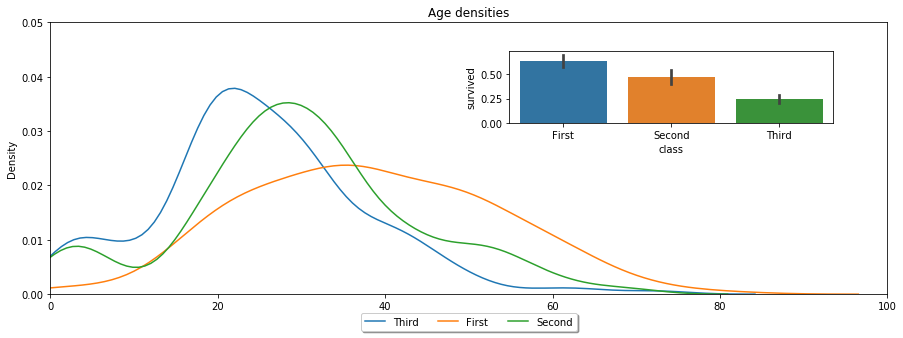

In [127]:
# [Answer to Ex. 5.2.1-4]
fig, ax= plt.subplots(figsize = (15,5)) # Dimensioning subplots
# Sub plot 1
ax.set_xlim([0,100])
ax.set_ylim([0,0.05])
# Plot KDE 
for x in titanic['class'].unique():
    kde = titanic.loc[titanic['class'] == x]
    sns.kdeplot(kde.age, label = x)
plt.ylabel('Density')
plt.xlabel('Age')
plt.title('Age densities')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=3) # Adding legend to main figure

# Subplot 2
ax2 = plt.axes([0.55, 0.6, 0.3, 0.2]) # Dimensioning subplot
sns.barplot(x='class',y='survived',data=titanic) # Barplot as subplot

plt.show()
